In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load).dropna()
ride_data = pd.read_csv(ride_data_to_load).dropna()

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how='outer', on="city")
#combined_data = combined_data.set_index("city")

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
combined_data.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_data = combined_data[combined_data["type"] == "Urban"]
suburban_data = combined_data[combined_data["type"] == "Suburban"]
rural_data = combined_data[combined_data["type"] == "Rural"]

urban_ride_count = urban_data.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_data.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_data.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_data.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_data.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_data.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_data.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_data.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_data.groupby(["city"]).mean()["driver_count"]


## Bubble Plot of Ride Sharing Data

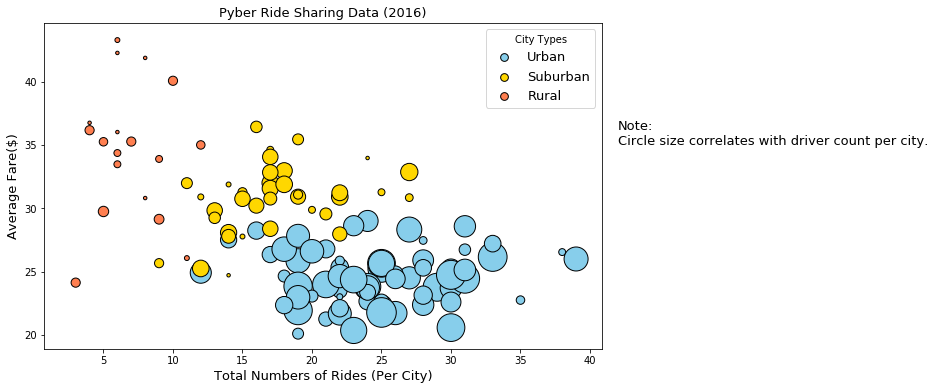

In [29]:
# Build the scatter plots for each city types

#Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=12*urban_driver_count, c="skyblue",edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Urban")
#Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=12*suburban_driver_count, c="gold",edgecolor="black", linewidths=1, marker="o", 
alpha=1.0, label="Suburban")
#Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=12*rural_driver_count, c="coral",edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Rural")

# Incorporate the other graph properties
# title, x and y lables 
plt.title("Pyber Ride Sharing Data (2016)", fontsize=13)
plt.xlabel("Total Numbers of Rides (Per City)", fontsize=13)
plt.ylabel("Average Fare($)", fontsize=13)

# Create a legend
legend = plt.legend(title="City Types", loc="best", scatterpoints=1, fontsize=13)

#Makes legends the same size
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

#Re-sizes plot box
plt.gcf().set_size_inches((10, 6)) 

#Adds side note
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.", fontsize=13)

#Save Figure
plt.savefig("scatter_by_city_type.png")

# Show plot
plt.show()

## Total Fares by City Type

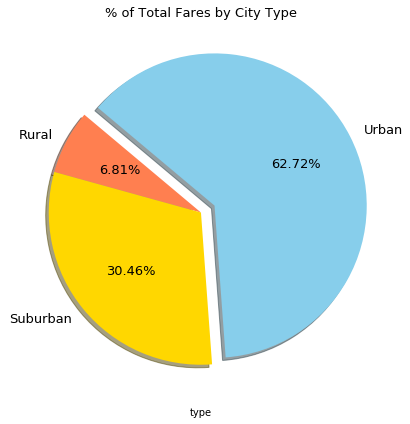

In [67]:
# Calculate Type Percents
perc_by_city_type = combined_data.groupby(["type"]).sum()["fare"] / combined_data["fare"].sum() * 100

# Build Pie Chart
plt.pie(perc_by_city_type,
        labels=["Rural", "Suburban", "Urban"],
        colors=["coral", "gold", "skyblue"], 
        explode=[0, 0, 0.1],
        autopct='%.2f%%', shadow=True, startangle=140,
        textprops={"fontsize": 13}) # re-sizes font's size
plt.title("% of Total Fares by City Type", fontsize=13)

#Re-sizes plot pie
perc_by_city_type.plot(figsize=(7,7))

# Save Figure
plt.savefig("pie_perc_by_city_type.png")

# Show Figure
plt.show()


In [ ]:
 ## Total Rides by City Type

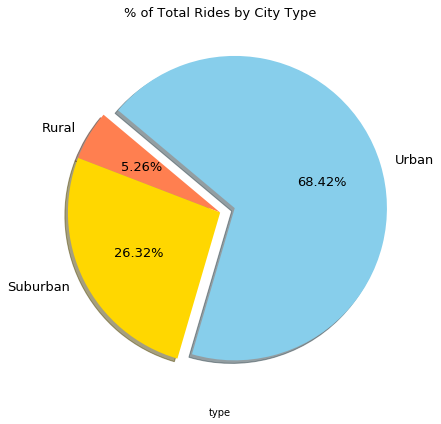

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [71]:
# Calculate Ride Percents
perc_by_city_ride = combined_data.groupby(["type"]).count()["ride_id"] / combined_data["ride_id"].count() * 100

# Build Pie Chart
plt.pie(perc_by_city_ride,
        labels=["Rural", "Suburban", "Urban"],
        colors=["coral", "gold", "skyblue"], 
        explode=[0, 0, 0.1],
        autopct='%.2f%%', shadow=True, startangle=140,
        textprops={"fontsize": 13}) # re-sizes font's size
plt.title("% of Total Rides by City Type", fontsize=13)

#Re-sizes plot pie
perc_by_city_type.plot(figsize=(7,7))

# Save Figure
plt.savefig("pie_perc_by_city_ride.png")

# Show Figure
plt.show()

perc_by_city_ride
# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()